```

                                DATA HACKING DAYS

                                      *(((*.                                    
                            ,*     .%#########    #/                            
                         .(/      ,%#######%/      /##.                         
                       *//*      .%########*       ,%##%(                       
                    ./////       *#########%.      #######%,                    
                  //////(,       (###########%%#%%############                  
                ////////(.       (##############################                
                 ///////(.       (###########################%#                 
                   .(////*       /###########.    (%#######%,                   
                      *(/(.      ,%########*       *%###%/                      
                        ./(,      (#########       *%##.                        
                           ,/      (##########    .%*                           
                              ,      (%###%#*    *                              
                           
                                 Banco Carrefour

```

### OCI Data Science - Useful Tips
Everything stored in the <span style="background-color: #d5d8dc ">/home/datascience</span> folder is now stored on your block volume drive. The <span style="background-color: #d5d8dc ">ads-examples</span> folder has moved outside of your working space. Notebook examples are now accessible through a Launcher tab "Notebook Examples" button.
<details>
<summary><font size="2">1. Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">2. OCI Configuration and Key Files Set Up</font></summary><p>Follow the instructions in the getting-started notebook. That notebook is accessible via the "Getting Started" Launcher tab button.</p>
</details>
<details>
<summary><font size="2">3. Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">4. Typical Cell Imports and Settings</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import MLData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">5. Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

### Dicas para acesso ao banco de dados Oracle ADW

- Não execute SELECT * FROM sem clausula WHERE para filtrar os dados ou limitar a quantidade de registros
- No Oracle para limitar a quantidade de linhas que será retornada por uma QUERY utilize WHERE ROWNUM < \<numero_de_linhas>

  SELECT * FROM TABELA WHERE ROWNUM < 10

  nesse caso, será retornado somente 10 linhas da consulta (sem uma sequência lógica)
  
- Podemos utilizar também a clausula SAMPLE para conseguir uma amostra (aproximada) de registros
  
  SELECT * FROM TABELA SAMPLE(1) 
  
  Extrai aproximadamente 1% de 

### Dica para instalação de pacotes Python (modulos)

- Abrir um terminal
- Executar o gerenciador de pacotes PIP
  
  pip install \<nome_do_pacote\>

### Setup ambiente e importações de módulos

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import logging
import os
import cx_Oracle
#logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.INFO)
#from ads.dataset.factory import DatasetFactory
#from sqlalchemy import create_engine

In [2]:
# Add TNS_ADMIN to the environment
os.environ['TNS_ADMIN'] = "/home/datascience/ADB/"
connection = cx_Oracle.connect('hackathon', 'bCfrCC0981267', 'adw_low')

### Tabelas disponíveis

#### Baixe e acesse a planilha "Dados_Hackathon.xlsx" para conhecer os campos e a volumetria de cada dataset

#### 1 - Visao Aquisicao: Chave é o CPF (criptografado)

In [3]:
TABELAS_AQUISICAO = pd.read_sql("SELECT table_name FROM ALL_tables WHERE UPPER(TABLE_NAME) LIKE '%AQUI%'", con=connection) 

In [4]:
TABELAS_AQUISICAO

,TABLE_NAME
0,EVE_MODELO_ENGAJAMENTO_AQUISICAO_HCKT
1,EVE_MODELO_PERFILPJ_ATC_AQUISICAO_HCKT
2,EVE_PUBLICO_AQUISICAO_HCKT
3,EVE_BUFFER_CCI_AQUISICAO_HCKT
4,EVE_BUFFER_ATC_AQUISICAO_HCKT


### Exemplo de leitura de um dataframe 'Atenção com o volume das tabelas!'

In [5]:
BUFFER_ATC = pd.read_sql('SELECT * FROM EVE_BUFFER_ATC_AQUISICAO_HCKT WHERE ROWNUM < 100', con=connection) 
BUFFER_ATC.head()

,CPF_CRIP,CPA_ID_CUPOM,ICPA_CD_ITEMCUPOM,MERC_TP_MERCDR,MERC_DS_DEPTOCCI,MERC_DS_SETORCCI,MERC_DS_GRUPO,MERC_DS_SUBGRUPO,MERC_DS_CLAS,MERC_DS_REDUZMERCDR,...,ICPA_VL_BONUS,ICPA_VL_BONUSATC,ICPA_QT_ITEMCOMPD,ICPA_SG_TIPOVENDA,ICPA_SG_EMBLG,ICPA_QT_EMBLG,ICPA_CD_FILIAL,FAL_NM_FLIAL,FAL_DS_DIVISREG,DATE_REF
0,7C489754975,6100320200527878,50698,ALIMENTO,PGC,PAS,RESFRIADOS,CURADOS,LINGUICA MISTA,LING.FINA MIST.PERDI,...,0.0,0.0,1,M,UND,1,78,VILA VELHA,DR-RJ/ES,20200527
1,7C489754975,6100320200527878,58935,ALIMENTO,PGC,LIQUIDA,BEBIDA,DESTILADOS,BATIDA/COQUETEL,COQUETEL BALACREAM,...,0.0,0.0,1,A,UND,1,78,VILA VELHA,DR-RJ/ES,20200527
2,7C489754975,6100320200527878,8327,ALIMENTO,PGC,PAS,PERECIVEIS LACTEOS,QUEIJOS,RALADO,QJO.RAL.PARM.VIGOR,...,0.0,0.0,3,A,PCT,1,78,VILA VELHA,DR-RJ/ES,20200527
3,7C489754975,6100320200527878,28159,ALIMENTO,PGC,LIQUIDA,BEBIDA,SUCO/REFRESCO,REFRESCO PTO BEBER ACIMA 500ML,TAMPICO,...,0.0,0.0,2,M,UND,1,78,VILA VELHA,DR-RJ/ES,20200527
4,7C489754975,6100320200527878,60076,ALIMENTO,PGC,LIQUIDA,BEBIDA,REFRIGERANTE,PET ATE 350ML,RF.FANTA LARANJA PET,...,0.0,0.0,12,M,UND,1,78,VILA VELHA,DR-RJ/ES,20200527


#### Dica: Você pode processar grande volume de dados, porém cuidado com o que traz para a memória do Pandas! Por exemplo, aqui fazemos uma contagem na tabela inteira de cupom. Isso é tranquilo, pois o retorno é uma única linha. Se você tentar trazer todo dataset para memória, dará erro de falta de memória!

In [15]:
BUFFER_ATC_CONTITEM = pd.read_sql('SELECT     merc_ds_deptocci  , COUNT(*) N FROM EVE_BUFFER_ATC_MANU_HCKT GROUP BY     merc_ds_deptocci  ORDER BY N DESC ', con=connection) 
BUFFER_ATC_CONTITEM

,MERC_DS_DEPTOCCI,N
0,PGC,86091586
1,PERECIVEIS,10370783
2,BAZAR,6293555
3,TEXTIL,186556
4,ELETRO,16542


In [13]:
BUFFER_CCI_CONTITEM = pd.read_sql('SELECT PRF_DS_DEPARTAMENTO, COUNT(*) N FROM EVE_BUFFER_CCI_MANU_HCKT GROUP BY PRF_DS_DEPARTAMENTO ORDER BY N DESC ', con=connection) 
BUFFER_CCI_CONTITEM

,PRF_DS_DEPARTAMENTO,N
0,PGC,21450710
1,PERECIVEIS,7787723
2,BAZAR,2430914
3,TEXTIL,1238337
4,POSTO,864034
5,ELETRO,416325
6,DROGARIA,58807
7,DESPESAS GERAIS,150
8,VENDAS PAPELAO,7


In [21]:
BUFFER_ATC_CONTITEM = pd.read_sql('SELECT  MERC_DS_SETORCCI  , COUNT(*) N FROM EVE_BUFFER_ATC_MANU_HCKT GROUP BY     MERC_DS_SETORCCI  ORDER BY N DESC ', con=connection) 
BUFFER_ATC_CONTITEM

,MERC_DS_SETORCCI,N
0,SECA,42875890
1,PAS,14625168
2,DPH,10909614
3,FLV,9713414
4,PERFUMARIA,9250237
5,LIQUIDA,8430677
6,CASA,5029537
7,JARDIM,520629
8,FERRAMENTAS,515834
9,SALSICHARIA,515718


In [28]:
BUFFER_CRF_CONTITEM = pd.read_sql('SELECT  PRF_DS_SETOR  , COUNT(*) N FROM EVE_BUFFER_CCI_MANU_HCKT GROUP BY     PRF_DS_SETOR  ORDER BY N DESC ', con=connection) 
BUFFER_CRF_CONTITEM.to_csv('BUFFER_CRF_CONTITEM.csv')
BUFFER_CRF_CONTITEM

,PRF_DS_SETOR,N
0,SECA,9832719
1,P.A.S.,4285203
2,F.L.V.,3617508
3,LIQUIDA,2552722
4,D P H,2389434
5,PERFUMARIA,2359810
6,SALSICHARIA,1963860
7,ACOUGUE,1189366
8,CASA,1012064
9,POSTO E SERVICOS,864034


In [31]:
BUFFER_carref= pd.read_sql("""SELECT * FROM EVE_BUFFER_CCI_MANU_HCKT WHERE PRF_DS_SETOR = 'BRICOLAGEM' and ROWNUM < 100 order by CPF_CRIP""", con=connection) 
BUFFER_carref.head()

,CPF_CRIP,TICU_ID_ITEMCUPOM,PRF_DS_DEPARTAMENTO,PRF_DS_SETOR,PRF_DS_FAMILIA,TICU_VL_TOTALITEM,ANOMES
0,0476B57D9FE,5650909998,BAZAR,BRICOLAGEM,COLAS E FITAS FITA ADESIVA,7.99,202003
1,095D0060010,5596127169,BAZAR,BRICOLAGEM,PINTURA PROTECAO,14.99,202003
2,0A0A23DC6C7,5636343475,BAZAR,BRICOLAGEM,FERRAMENTAS ELET FURADEIRA,114.90,202003
3,10B44968B63,5567783154,BAZAR,BRICOLAGEM,ILUMINACAO LAMPADA LED,15.99,202003
4,11450B001BE,5632393108,BAZAR,BRICOLAGEM,COLAS E FITAS COLA,4.39,202003


In [229]:
BUFFER_carref= pd.read_sql("""SELECT * FROM EVE_BUFFER_CCI_MANU_HCKT WHERE to_char(TICU_ID_ITEMCUPOM) like '60076%' and ROWNUM < 100 order by CPF_CRIP""", con=connection) 
BUFFER_carref.head()

,CPF_CRIP,TICU_ID_ITEMCUPOM,PRF_DS_DEPARTAMENTO,PRF_DS_SETOR,PRF_DS_FAMILIA,TICU_VL_TOTALITEM,ANOMES
0,0B40789B3A9,6007650603,PGC,SECA,POLVILHO,4.79,202007
1,0B40789B3A9,6007650598,PGC,SECA,BISCOITO TRADICIONAL MAISENA,8.97,202007
2,0B40789B3A9,6007650601,PGC,SECA,AVEIA FLOCOS REGULAR,1.59,202007
3,0B40789B3A9,6007650600,BAZAR,CASA,OUTROS,29.90,202007
4,0B40789B3A9,6007650599,PGC,LIQUIDA,ACIMA DE 1001ML COLA,5.49,202007


In [230]:
BUFFER_carref= pd.read_sql("""SELECT * FROM EVE_BUFFER_CCI_MANU_HCKT WHERE to_char(TICU_ID_ITEMCUPOM) like '%60076' and ROWNUM < 100 order by CPF_CRIP""", con=connection) 
BUFFER_carref.head()

,CPF_CRIP,TICU_ID_ITEMCUPOM,PRF_DS_DEPARTAMENTO,PRF_DS_SETOR,PRF_DS_FAMILIA,TICU_VL_TOTALITEM,ANOMES
0,00C37261BDE,5683560076,PGC,PERFUMARIA,BARRA PERFUMADO,7.45,202004
1,01FEA58C0B8,5700560076,PGC,SECA,BISCOITO RECHEADO CHOCOLATE,1.99,202004
2,099B97F7D00,5545160076,BAZAR,CASA,SACOS PARA LIXO DE 15L A 30L,18.99,202003
3,0A6693DE31B,5703460076,PERECIVEIS,ACOUGUE,CARNE A VACUO PROMOCAO,8.57,202004
4,0E47841E42C,5770160076,PERECIVEIS,F.L.V.,BATATA,2.82,202004


In [32]:
BUFFER_atc= pd.read_sql('SELECT * FROM EVE_BUFFER_ATC_MANU_HCKT WHERE ROWNUM < 100 order by CPF_CRIP ', con=connection) 
BUFFER_atc.head()

,CPF_CRIP,CPA_ID_CUPOM,ICPA_CD_ITEMCUPOM,MERC_TP_MERCDR,MERC_DS_DEPTOCCI,MERC_DS_SETORCCI,MERC_DS_GRUPO,MERC_DS_SUBGRUPO,MERC_DS_CLAS,MERC_DS_REDUZMERCDR,...,ICPA_VL_BONUS,ICPA_VL_BONUSATC,ICPA_QT_ITEMCOMPD,ICPA_SG_TIPOVENDA,ICPA_SG_EMBLG,ICPA_QT_EMBLG,ICPA_CD_FILIAL,FAL_NM_FLIAL,FAL_DS_DIVISREG,DATE_REF
0,01C26CA7CB4,9219120200124793,61006,ALIMENTO,PGC,PERFUMARIA,PERFUMARIA,SABONETE,BARRA,SAB.LUX,...,0.0,0.0,2,M,UND,1,93,EUNAPOLIS,DR-BA/SE,20200124
1,08BDC26E512,74355202001244199,28159,ALIMENTO,PGC,LIQUIDA,BEBIDA,SUCO/REFRESCO,REFRESCO PTO BEBER ACIMA 500ML,TAMPICO,...,0.0,0.0,1,A,UND,1,199,PATOS,DR-PE,20200124
2,09A19B217BB,114969202001241751,1622,ALIMENTO,PERECIVEIS,FLV,HORTIFRUTIGRANJEIRO,TEMPEROS,TEMPERO,COENTRO,...,0.0,0.0,20,M,MCO,1,51,NATAL SUL,DR-PE,20200124
3,0CF9696559A,607062020012424201,13403,ALIMENTO,PGC,DPH,LAVANDERIA,AMACIANTE/LAVA ROUPA,ATE 2LT,AMAC.YPE,...,0.0,0.0,1,A,FRC,1,201,JI PARANA,DR-MT,20200124
4,0FB3CFB909C,2901120200124532,1606,ALIMENTO,PERECIVEIS,FLV,HORTIFRUTIGRANJEIRO,VERDURA,VERDURA,ACELGA,...,0.0,0.0,1,M,UND,1,32,LIMEIRA,DR-SP INTERIOR,20200124


In [30]:
pd.read_sql('SELECT max(DATE_REF) FROM EVE_BUFFER_ATC_MANU_HCKT', con=connection) 

,MAX(DATE_REF)
0,20200929


In [29]:
pd.read_sql("""SELECT distinct a.CPF_CRIP FROM EVE_BUFFER_CCI_MANU_HCKT a inner join EVE_BUFFER_ATC_MANU_HCKT b
on a.CPF_CRIP=b.CPF_CRIP
WHERE ROWNUM < 100""", con=connection)

,CPF_CRIP
0,3ADCC420C90
1,45373C119BE
2,121F2F232D2
3,6D65DC3E771
4,BFAD3950344


In [36]:
#BUFFER_atc_AS_CRF = pd.read_sql("""select
#CPF_CRIP,
#int(DATE_REF,100) ANOMES,
#CPA_ID_CUPOM TICU_ID_ITEMCUPOM,
#MERC_DS_SETORCCI PRF_DS_SETOR,
#MERC_TP_MERCDR PRF_DS_DEPARTAMENTO
#from EVE_BUFFER_ATC_MANU_HCKT
#where DATE_REF>=20200601
#""")

In [5]:
union_atc_carref_202007 = pd.read_sql(
"""
select 
CPF_CRIP,
202007 as anomes,
count(distinct case when PRF_DS_SETOR in ('SECA','SECA') then TICU_ID_ITEMCUPOM end) qtd_tickets_seca,
count(distinct case when PRF_DS_SETOR in ('PAS','P.A.S.') then TICU_ID_ITEMCUPOM end) qtd_tickets_pas,
count(distinct case when PRF_DS_SETOR in ('DPH','D P H') then TICU_ID_ITEMCUPOM end) qtd_tickets_dph,
count(distinct case when PRF_DS_SETOR in ('FLV','F.L.V.') then TICU_ID_ITEMCUPOM end) qtd_tickets_flv,
count(distinct case when PRF_DS_SETOR in ('PERFUMARIA','PERFUMARIA') then TICU_ID_ITEMCUPOM end) qtd_tickets_perfum,
count(distinct case when PRF_DS_SETOR in ('LIQUIDA','LIQUIDA') then TICU_ID_ITEMCUPOM end) qtd_tickets_liq,
count(distinct case when PRF_DS_SETOR in ('CASA','CASA') then TICU_ID_ITEMCUPOM end) qtd_tickets_casa,
count(distinct case when PRF_DS_SETOR in ('JARDIM','JARDINAGEM') then TICU_ID_ITEMCUPOM end) qtd_tickets_jardin,
count(distinct case when PRF_DS_SETOR in ('FERRAMENTAS','FERRAMENTAS AUTOMOTIVOS') then TICU_ID_ITEMCUPOM end) qtd_tickets_ferram,
count(distinct case when PRF_DS_SETOR in ('SALSICHARIA','SALSICHARIA') then TICU_ID_ITEMCUPOM end) qtd_tickets_salsic,
count(distinct case when PRF_DS_SETOR in ('CAL?ADOS','CALCADOS E ACESSORIOS','CALCADOS') then TICU_ID_ITEMCUPOM end) qtd_tickets_calcad,
count(distinct case when PRF_DS_SETOR in ('CAMA E MESA','CAMA / MESA /BANHO','CAMA MESA E BANHO') then TICU_ID_ITEMCUPOM end) qtd_tickets_cameba,
count(distinct case when PRF_DS_SETOR in ('FOTO CINE OTICA','FOTO/CINE/OTICAS') then TICU_ID_ITEMCUPOM end) qtd_tickets_foto,
count(distinct case when PRF_DS_DEPARTAMENTO in ('POSTO') then TICU_ID_ITEMCUPOM end) qtd_tickets_posto,
count(distinct case when PRF_DS_DEPARTAMENTO in ('TEXTIL') then TICU_ID_ITEMCUPOM end) qtd_tickets_text,
count(distinct case when PRF_DS_DEPARTAMENTO in ('ELETRO') then TICU_ID_ITEMCUPOM end) qtd_tickets_eletro,
count(distinct case when PRF_DS_DEPARTAMENTO in ('DROGARIA') then TICU_ID_ITEMCUPOM end) qtd_tickets_drogaria,
count(case when PRF_DS_SETOR in ('SECA','SECA') then 1 end)  qtd_items_seca,
count(case when PRF_DS_SETOR in ('PAS','P.A.S.') then 1 end) qtd_items_pas,
count(case when PRF_DS_SETOR in ('DPH','D P H') then  1 end) qtd_items_dph,
count(case when PRF_DS_SETOR in ('FLV','F.L.V.') then  1 end) qtd_items_flv,
count(case when PRF_DS_SETOR in ('PERFUMARIA','PERFUMARIA') then  1 end) qtd_items_perfum,
count(case when PRF_DS_SETOR in ('LIQUIDA','LIQUIDA') then  1 end) qtd_items_liq,
count(case when PRF_DS_SETOR in ('CASA','CASA') then  1 end) qtd_items_casa,
count(case when PRF_DS_SETOR in ('JARDIM','JARDINAGEM') then  1 end) qtd_items_jardin,
count(case when PRF_DS_SETOR in ('FERRAMENTAS','FERRAMENTAS AUTOMOTIVOS') then  1 end) qtd_items_ferram,
count(case when PRF_DS_SETOR in ('SALSICHARIA','SALSICHARIA') then  1 end) qtd_items_salsic,
count(case when PRF_DS_SETOR in ('CAL?ADOS','CALCADOS E ACESSORIOS','CALCADOS') then  1 end) qtd_items_calcad,
count(case when PRF_DS_SETOR in ('CAMA E MESA','CAMA / MESA /BANHO','CAMA MESA E BANHO') then  1 end) qtd_items_cameba,
count(case when PRF_DS_SETOR in ('FOTO CINE OTICA','FOTO/CINE/OTICAS') then  1 end) qtd_items_foto,
count(case when PRF_DS_DEPARTAMENTO in ('POSTO') then  1 end) qtd_items_posto,
count(case when PRF_DS_DEPARTAMENTO in ('TEXTIL') then  1 end) qtd_items_text,
count(case when PRF_DS_DEPARTAMENTO in ('ELETRO') then  1 end) qtd_items_eletro,
count(case when PRF_DS_DEPARTAMENTO in ('DROGARIA') then  1 end) qtd_items_drogaria
from
(select * from
(select
CPF_CRIP,
trunc(DATE_REF,100) ANOMES,
CPA_ID_CUPOM TICU_ID_ITEMCUPOM,
MERC_DS_SETORCCI PRF_DS_SETOR,
MERC_TP_MERCDR PRF_DS_DEPARTAMENTO
from EVE_BUFFER_ATC_MANU_HCKT
where DATE_REF>=20200501 and DATE_REF<=20200731)
union all
(select
CPF_CRIP,
ANOMES,
TICU_ID_ITEMCUPOM,
PRF_DS_SETOR,
PRF_DS_DEPARTAMENTO
from EVE_BUFFER_CCI_MANU_HCKT
where ANOMES>=202005 and ANOMES<=202007))
group by 
CPF_CRIP
"""
,con=connection) 

In [6]:
union_atc_carref = pd.read_sql(
"""
select 
CPF_CRIP,
202008 as anomes,
count(distinct case when PRF_DS_SETOR in ('SECA','SECA') then TICU_ID_ITEMCUPOM end) qtd_tickets_seca,
count(distinct case when PRF_DS_SETOR in ('PAS','P.A.S.') then TICU_ID_ITEMCUPOM end) qtd_tickets_pas,
count(distinct case when PRF_DS_SETOR in ('DPH','D P H') then TICU_ID_ITEMCUPOM end) qtd_tickets_dph,
count(distinct case when PRF_DS_SETOR in ('FLV','F.L.V.') then TICU_ID_ITEMCUPOM end) qtd_tickets_flv,
count(distinct case when PRF_DS_SETOR in ('PERFUMARIA','PERFUMARIA') then TICU_ID_ITEMCUPOM end) qtd_tickets_perfum,
count(distinct case when PRF_DS_SETOR in ('LIQUIDA','LIQUIDA') then TICU_ID_ITEMCUPOM end) qtd_tickets_liq,
count(distinct case when PRF_DS_SETOR in ('CASA','CASA') then TICU_ID_ITEMCUPOM end) qtd_tickets_casa,
count(distinct case when PRF_DS_SETOR in ('JARDIM','JARDINAGEM') then TICU_ID_ITEMCUPOM end) qtd_tickets_jardin,
count(distinct case when PRF_DS_SETOR in ('FERRAMENTAS','FERRAMENTAS AUTOMOTIVOS') then TICU_ID_ITEMCUPOM end) qtd_tickets_ferram,
count(distinct case when PRF_DS_SETOR in ('SALSICHARIA','SALSICHARIA') then TICU_ID_ITEMCUPOM end) qtd_tickets_salsic,
count(distinct case when PRF_DS_SETOR in ('CAL?ADOS','CALCADOS E ACESSORIOS','CALCADOS') then TICU_ID_ITEMCUPOM end) qtd_tickets_calcad,
count(distinct case when PRF_DS_SETOR in ('CAMA E MESA','CAMA / MESA /BANHO','CAMA MESA E BANHO') then TICU_ID_ITEMCUPOM end) qtd_tickets_cameba,
count(distinct case when PRF_DS_SETOR in ('FOTO CINE OTICA','FOTO/CINE/OTICAS') then TICU_ID_ITEMCUPOM end) qtd_tickets_foto,
count(distinct case when PRF_DS_DEPARTAMENTO in ('POSTO') then TICU_ID_ITEMCUPOM end) qtd_tickets_posto,
count(distinct case when PRF_DS_DEPARTAMENTO in ('TEXTIL') then TICU_ID_ITEMCUPOM end) qtd_tickets_text,
count(distinct case when PRF_DS_DEPARTAMENTO in ('ELETRO') then TICU_ID_ITEMCUPOM end) qtd_tickets_eletro,
count(distinct case when PRF_DS_DEPARTAMENTO in ('DROGARIA') then TICU_ID_ITEMCUPOM end) qtd_tickets_drogaria,
count(case when PRF_DS_SETOR in ('SECA','SECA') then 1 end)  qtd_items_seca,
count(case when PRF_DS_SETOR in ('PAS','P.A.S.') then 1 end) qtd_items_pas,
count(case when PRF_DS_SETOR in ('DPH','D P H') then  1 end) qtd_items_dph,
count(case when PRF_DS_SETOR in ('FLV','F.L.V.') then  1 end) qtd_items_flv,
count(case when PRF_DS_SETOR in ('PERFUMARIA','PERFUMARIA') then  1 end) qtd_items_perfum,
count(case when PRF_DS_SETOR in ('LIQUIDA','LIQUIDA') then  1 end) qtd_items_liq,
count(case when PRF_DS_SETOR in ('CASA','CASA') then  1 end) qtd_items_casa,
count(case when PRF_DS_SETOR in ('JARDIM','JARDINAGEM') then  1 end) qtd_items_jardin,
count(case when PRF_DS_SETOR in ('FERRAMENTAS','FERRAMENTAS AUTOMOTIVOS') then  1 end) qtd_items_ferram,
count(case when PRF_DS_SETOR in ('SALSICHARIA','SALSICHARIA') then  1 end) qtd_items_salsic,
count(case when PRF_DS_SETOR in ('CAL?ADOS','CALCADOS E ACESSORIOS','CALCADOS') then  1 end) qtd_items_calcad,
count(case when PRF_DS_SETOR in ('CAMA E MESA','CAMA / MESA /BANHO','CAMA MESA E BANHO') then  1 end) qtd_items_cameba,
count(case when PRF_DS_SETOR in ('FOTO CINE OTICA','FOTO/CINE/OTICAS') then  1 end) qtd_items_foto,
count(case when PRF_DS_DEPARTAMENTO in ('POSTO') then  1 end) qtd_items_posto,
count(case when PRF_DS_DEPARTAMENTO in ('TEXTIL') then  1 end) qtd_items_text,
count(case when PRF_DS_DEPARTAMENTO in ('ELETRO') then  1 end) qtd_items_eletro,
count(case when PRF_DS_DEPARTAMENTO in ('DROGARIA') then  1 end) qtd_items_drogaria
from
(select * from
(select
CPF_CRIP,
trunc(DATE_REF,100) ANOMES,
CPA_ID_CUPOM TICU_ID_ITEMCUPOM,
MERC_DS_SETORCCI PRF_DS_SETOR,
MERC_TP_MERCDR PRF_DS_DEPARTAMENTO
from EVE_BUFFER_ATC_MANU_HCKT
where DATE_REF>=20200601 and DATE_REF<=20200831)
union all
(select
CPF_CRIP,
ANOMES,
TICU_ID_ITEMCUPOM,
PRF_DS_SETOR,
PRF_DS_DEPARTAMENTO
from EVE_BUFFER_CCI_MANU_HCKT
where ANOMES>=202006 and ANOMES<=202008))
group by 
CPF_CRIP
"""
,con=connection) 

In [37]:
union_atc_carref.shape

(823242, 36)

In [7]:
target_atc_carref_202007 = pd.read_sql(
"""
select 
CPF_CRIP,
max(case when PRF_DS_SETOR in ('SECA','SECA') then 1 else 0 end)  flag_seca,
max(case when PRF_DS_SETOR in ('PAS','P.A.S.') then 1 else 0 end) flag_pas,
max(case when PRF_DS_SETOR in ('DPH','D P H') then  1 else 0 end) flag_dph,
max(case when PRF_DS_SETOR in ('FLV','F.L.V.') then  1 else 0 end) flag_flv,
max(case when PRF_DS_SETOR in ('PERFUMARIA','PERFUMARIA') then  1 else 0 end) flag_perfum,
max(case when PRF_DS_SETOR in ('LIQUIDA','LIQUIDA') then  1 else 0 end) flag_liq,
max(case when PRF_DS_SETOR in ('CASA','CASA') then  1 else 0 end) flag_casa,
max(case when PRF_DS_SETOR in ('JARDIM','JARDINAGEM') then  1 else 0 end) flag_jardin,
max(case when PRF_DS_SETOR in ('FERRAMENTAS','FERRAMENTAS AUTOMOTIVOS') then  1 else 0 end) flag_ferram,
max(case when PRF_DS_SETOR in ('SALSICHARIA','SALSICHARIA') then  1 else 0 end) flag_salsic,
max(case when PRF_DS_SETOR in ('CAL?ADOS','CALCADOS E ACESSORIOS','CALCADOS') then  1 else 0 end) flag_calcad,
max(case when PRF_DS_SETOR in ('CAMA E MESA','CAMA / MESA /BANHO','CAMA MESA E BANHO') then  1 else 0 end) flag_cameba,
max(case when PRF_DS_SETOR in ('FOTO CINE OTICA','FOTO/CINE/OTICAS') then  1 else 0 end) flag_foto,
max(case when PRF_DS_DEPARTAMENTO in ('POSTO') then  1 else 0 end) flag_posto,
max(case when PRF_DS_DEPARTAMENTO in ('TEXTIL') then  1 else 0 end) flag_text,
max(case when PRF_DS_DEPARTAMENTO in ('ELETRO') then  1 else 0 end) flag_eletro,
max(case when PRF_DS_DEPARTAMENTO in ('DROGARIA') then  1 else 0 end) flag_drogaria
from
(select * from
(select
CPF_CRIP,
trunc(DATE_REF,100) ANOMES,
CPA_ID_CUPOM TICU_ID_ITEMCUPOM,
MERC_DS_SETORCCI PRF_DS_SETOR,
MERC_TP_MERCDR PRF_DS_DEPARTAMENTO
from EVE_BUFFER_ATC_MANU_HCKT
where DATE_REF>=20200801 and DATE_REF<=20200831 )
union all
(select
CPF_CRIP,
ANOMES,
TICU_ID_ITEMCUPOM,
PRF_DS_SETOR,
PRF_DS_DEPARTAMENTO
from EVE_BUFFER_CCI_MANU_HCKT
where ANOMES=202008))
group by 
CPF_CRIP
"""
,con=connection)

In [8]:
target_atc_carref = pd.read_sql(
"""
select 
CPF_CRIP,
max(case when PRF_DS_SETOR in ('SECA','SECA') then 1 else 0 end)  flag_seca,
max(case when PRF_DS_SETOR in ('PAS','P.A.S.') then 1 else 0 end) flag_pas,
max(case when PRF_DS_SETOR in ('DPH','D P H') then  1 else 0 end) flag_dph,
max(case when PRF_DS_SETOR in ('FLV','F.L.V.') then  1 else 0 end) flag_flv,
max(case when PRF_DS_SETOR in ('PERFUMARIA','PERFUMARIA') then  1 else 0 end) flag_perfum,
max(case when PRF_DS_SETOR in ('LIQUIDA','LIQUIDA') then  1 else 0 end) flag_liq,
max(case when PRF_DS_SETOR in ('CASA','CASA') then  1 else 0 end) flag_casa,
max(case when PRF_DS_SETOR in ('JARDIM','JARDINAGEM') then  1 else 0 end) flag_jardin,
max(case when PRF_DS_SETOR in ('FERRAMENTAS','FERRAMENTAS AUTOMOTIVOS') then  1 else 0 end) flag_ferram,
max(case when PRF_DS_SETOR in ('SALSICHARIA','SALSICHARIA') then  1 else 0 end) flag_salsic,
max(case when PRF_DS_SETOR in ('CAL?ADOS','CALCADOS E ACESSORIOS','CALCADOS') then  1 else 0 end) flag_calcad,
max(case when PRF_DS_SETOR in ('CAMA E MESA','CAMA / MESA /BANHO','CAMA MESA E BANHO') then  1 else 0 end) flag_cameba,
max(case when PRF_DS_SETOR in ('FOTO CINE OTICA','FOTO/CINE/OTICAS') then  1 else 0 end) flag_foto,
max(case when PRF_DS_DEPARTAMENTO in ('POSTO') then  1 else 0 end) flag_posto,
max(case when PRF_DS_DEPARTAMENTO in ('TEXTIL') then  1 else 0 end) flag_text,
max(case when PRF_DS_DEPARTAMENTO in ('ELETRO') then  1 else 0 end) flag_eletro,
max(case when PRF_DS_DEPARTAMENTO in ('DROGARIA') then  1 else 0 end) flag_drogaria
from
(select * from
(select
CPF_CRIP,
trunc(DATE_REF,100) ANOMES,
CPA_ID_CUPOM TICU_ID_ITEMCUPOM,
MERC_DS_SETORCCI PRF_DS_SETOR,
MERC_TP_MERCDR PRF_DS_DEPARTAMENTO
from EVE_BUFFER_ATC_MANU_HCKT
where DATE_REF>=20200901)
union all
(select
CPF_CRIP,
ANOMES,
TICU_ID_ITEMCUPOM,
PRF_DS_SETOR,
PRF_DS_DEPARTAMENTO
from EVE_BUFFER_CCI_MANU_HCKT
where ANOMES>=202009))
group by 
CPF_CRIP
"""
,con=connection) 

In [45]:
target_atc_carref.shape

(530893, 18)

In [9]:
df=union_atc_carref_202007.join(target_atc_carref_202007.set_index('CPF_CRIP'), on='CPF_CRIP')
df=df.dropna()

In [10]:
valid=union_atc_carref.join(target_atc_carref.set_index('CPF_CRIP'), on='CPF_CRIP')
valid.shape

(823242, 53)

In [176]:
valid.head()

,CPF_CRIP,ANOMES,QTD_TICKETS_SECA,QTD_TICKETS_PAS,QTD_TICKETS_DPH,QTD_TICKETS_FLV,QTD_TICKETS_PERFUM,QTD_TICKETS_LIQ,QTD_TICKETS_CASA,QTD_TICKETS_JARDIN,...,FLAG_JARDIN,FLAG_FERRAM,FLAG_SALSIC,FLAG_CALCAD,FLAG_CAMEBA,FLAG_FOTO,FLAG_POSTO,FLAG_TEXT,FLAG_ELETRO,FLAG_DROGARIA
0,000018274B5,202008,8,6,2,10,0,0,4,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00001FD42F6,202008,2,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00002CF143F,202008,4,2,2,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0000368E069,202008,51,32,10,1,10,21,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,000086A0954,202008,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [177]:
valid.describe()

,ANOMES,QTD_TICKETS_SECA,QTD_TICKETS_PAS,QTD_TICKETS_DPH,QTD_TICKETS_FLV,QTD_TICKETS_PERFUM,QTD_TICKETS_LIQ,QTD_TICKETS_CASA,QTD_TICKETS_JARDIN,QTD_TICKETS_FERRAM,...,FLAG_JARDIN,FLAG_FERRAM,FLAG_SALSIC,FLAG_CALCAD,FLAG_CAMEBA,FLAG_FOTO,FLAG_POSTO,FLAG_TEXT,FLAG_ELETRO,FLAG_DROGARIA
count,823242.0,823242.000000,823242.000000,823242.000000,823242.000000,823242.000000,823242.000000,823242.000000,823242.000000,823242.000000,...,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000
mean,202008.0,6.081852,3.256929,2.030110,2.635140,1.927373,2.141492,1.377792,0.298321,0.226520,...,0.098642,0.087025,0.253097,0.037466,0.033263,0.010795,0.159513,0.124138,0.064857,0.026187
std,0.0,13.092765,5.976535,4.125596,7.104666,3.630458,4.174326,2.158671,1.165258,0.584856,...,0.298181,0.281871,0.434786,0.189901,0.179324,0.103337,0.366154,0.329740,0.246274,0.159692
min,202008.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202008.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202008.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202008.0,5.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202008.0,416.000000,223.000000,209.000000,451.000000,133.000000,197.000000,71.000000,187.000000,16.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 80 mil clientes novos por mês (ATC + CARREF)
# churn em 3 meses ~50 %

In [11]:
valid=valid.dropna()

In [179]:
valid.describe()

,ANOMES,QTD_TICKETS_SECA,QTD_TICKETS_PAS,QTD_TICKETS_DPH,QTD_TICKETS_FLV,QTD_TICKETS_PERFUM,QTD_TICKETS_LIQ,QTD_TICKETS_CASA,QTD_TICKETS_JARDIN,QTD_TICKETS_FERRAM,...,FLAG_JARDIN,FLAG_FERRAM,FLAG_SALSIC,FLAG_CALCAD,FLAG_CAMEBA,FLAG_FOTO,FLAG_POSTO,FLAG_TEXT,FLAG_ELETRO,FLAG_DROGARIA
count,448540.0,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,...,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000,448540.000000
mean,202008.0,8.339047,4.438599,2.706416,3.680029,2.525955,2.883168,1.757801,0.381248,0.269182,...,0.098642,0.087025,0.253097,0.037466,0.033263,0.010795,0.159513,0.124138,0.064857,0.026187
std,0.0,15.968168,7.324780,4.988266,8.984725,4.336722,5.117437,2.597917,1.385625,0.655452,...,0.298181,0.281871,0.434786,0.189901,0.179324,0.103337,0.366154,0.329740,0.246274,0.159692
min,202008.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202008.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202008.0,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202008.0,8.000000,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202008.0,416.000000,223.000000,209.000000,451.000000,133.000000,197.000000,71.000000,187.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
vars=df.columns.tolist()
vars.remove('CPF_CRIP')
vars.remove('ANOMES')
vars.remove('FLAG_SECA')
vars.remove('FLAG_PAS')
vars.remove('FLAG_DPH')
vars.remove('FLAG_FLV')
vars.remove('FLAG_PERFUM')
vars.remove('FLAG_LIQ')
vars.remove('FLAG_CASA')
vars.remove('FLAG_JARDIN')
vars.remove('FLAG_FERRAM')
vars.remove('FLAG_SALSIC')
vars.remove('FLAG_CALCAD')
vars.remove('FLAG_CAMEBA')
vars.remove('FLAG_FOTO')
vars.remove('FLAG_POSTO')
vars.remove('FLAG_TEXT')
vars.remove('FLAG_ELETRO')
vars.remove('FLAG_DROGARIA')

In [13]:
target=list()
target.append('FLAG_SECA')
target.append('FLAG_PAS')
target.append('FLAG_DPH')
target.append('FLAG_FLV')
target.append('FLAG_PERFUM')
target.append('FLAG_LIQ')
target.append('FLAG_CASA')
target.append('FLAG_JARDIN')
target.append('FLAG_FERRAM')
target.append('FLAG_SALSIC')
target.append('FLAG_CALCAD')
target.append('FLAG_CAMEBA')
target.append('FLAG_FOTO')
target.append('FLAG_POSTO')
target.append('FLAG_TEXT')
target.append('FLAG_ELETRO')
target.append('FLAG_DROGARIA')

In [71]:
df[df[target[0]]==1][vars].head()

,QTD_TICKETS_SECA,QTD_TICKETS_PAS,QTD_TICKETS_DPH,QTD_TICKETS_FLV,QTD_TICKETS_PERFUM,QTD_TICKETS_LIQ,QTD_TICKETS_CASA,QTD_TICKETS_JARDIN,QTD_TICKETS_FERRAM,QTD_TICKETS_SALSIC,...,QTD_ITEMS_JARDIN,QTD_ITEMS_FERRAM,QTD_ITEMS_SALSIC,QTD_ITEMS_CALCAD,QTD_ITEMS_CAMEBA,QTD_ITEMS_FOTO,QTD_ITEMS_POSTO,QTD_ITEMS_TEXT,QTD_ITEMS_ELETRO,QTD_ITEMS_DROGARIA
0,8,6,2,10,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,51,32,10,1,10,21,4,0,0,3,...,0,0,3,1,0,0,0,1,0,0
5,3,3,3,3,3,3,3,0,1,1,...,0,1,1,0,0,0,0,0,0,0
8,0,0,1,1,0,0,2,2,1,0,...,2,1,0,0,0,0,0,3,0,0
9,1,1,1,0,1,1,1,0,0,3,...,0,0,3,0,0,0,0,0,0,0


In [76]:
df[vars].corr().to_csv('Correlacao_entre_setores.csv')

In [75]:
df[target].corr().to_csv('Correlacao_entre_targets.csv')

In [158]:
len(vars)

41

In [14]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from matplotlib import pyplot    
scaler = preprocessing.StandardScaler()

In [157]:
desenv.head()

,QTD_TICKETS_SECA,QTD_TICKETS_PAS,QTD_TICKETS_DPH,QTD_TICKETS_FLV,QTD_TICKETS_PERFUM,QTD_TICKETS_LIQ,QTD_TICKETS_CASA,QTD_TICKETS_JARDIN,QTD_TICKETS_FERRAM,QTD_TICKETS_SALSIC,...,QTD_ITEMS_TEXT,QTD_ITEMS_ELETRO,QTD_ITEMS_DROGARIA,FLAG_SECA,FLAG_SECA,FLAG_SECA,FLAG_SECA,FLAG_SECA,FLAG_SECA,FLAG_SECA
0,8,6,2,10,0,0,4,0,0,0,...,0,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,51,32,10,1,10,21,4,0,0,3,...,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,3,3,3,3,3,3,0,1,1,...,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0,0,1,1,0,0,2,2,1,0,...,3,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1,1,1,0,1,1,1,0,0,3,...,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [151]:
min(df[df[target[0]]==0].shape[0],df[df[target[0]]==1].shape[0])

118367

In [15]:
vars=df.columns.tolist()
vars.remove('CPF_CRIP')
vars.remove('ANOMES')
vars.remove('FLAG_SECA')
vars.remove('FLAG_PAS')
vars.remove('FLAG_DPH')
vars.remove('FLAG_FLV')
vars.remove('FLAG_PERFUM')
vars.remove('FLAG_LIQ')
vars.remove('FLAG_CASA')
vars.remove('FLAG_JARDIN')
vars.remove('FLAG_FERRAM')
vars.remove('FLAG_SALSIC')
vars.remove('FLAG_CALCAD')
vars.remove('FLAG_CAMEBA')
vars.remove('FLAG_FOTO')
vars.remove('FLAG_POSTO')
vars.remove('FLAG_TEXT')
vars.remove('FLAG_ELETRO')
vars.remove('FLAG_DROGARIA')
target=list()
target.append('FLAG_SECA')
target.append('FLAG_PAS')
target.append('FLAG_DPH')
target.append('FLAG_FLV')
target.append('FLAG_PERFUM')
target.append('FLAG_LIQ')
target.append('FLAG_CASA')
target.append('FLAG_JARDIN')
target.append('FLAG_FERRAM')
target.append('FLAG_SALSIC')
target.append('FLAG_CALCAD')
target.append('FLAG_CAMEBA')
target.append('FLAG_FOTO')
target.append('FLAG_POSTO')
target.append('FLAG_TEXT')
target.append('FLAG_ELETRO')
target.append('FLAG_DROGARIA')

In [200]:
len(target)

17

In [204]:
'prob_'+target[2]

'prob_FLAG_DPH'

FLAG_SECA
{'penalty': 'l2'}
              precision    recall  f1-score   support

         0.0       0.70      0.21      0.32    118367
         1.0       0.77      0.97      0.86    330173

    accuracy                           0.77    448540
   macro avg       0.74      0.59      0.59    448540
weighted avg       0.75      0.77      0.72    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.805


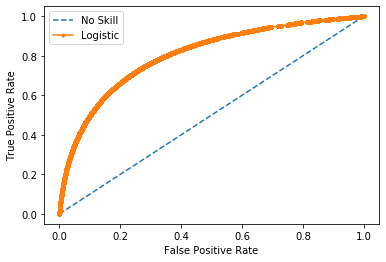

FLAG_PAS
{'penalty': 'l2'}
              precision    recall  f1-score   support

         0.0       0.66      0.60      0.63    153766
         1.0       0.80      0.84      0.82    294774

    accuracy                           0.76    448540
   macro avg       0.73      0.72      0.72    448540
weighted avg       0.75      0.76      0.75    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.808


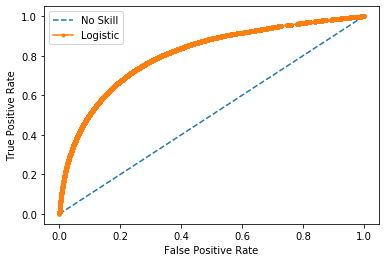

FLAG_DPH
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77    229793
         1.0       0.79      0.64      0.71    218747

    accuracy                           0.74    448540
   macro avg       0.75      0.74      0.74    448540
weighted avg       0.75      0.74      0.74    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.815


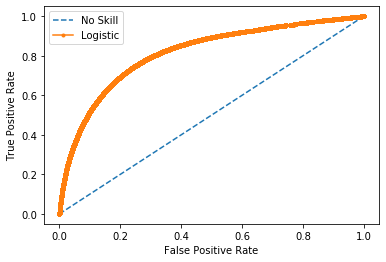

FLAG_FLV
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76    232221
         1.0       0.77      0.62      0.68    216319

    accuracy                           0.73    448540
   macro avg       0.73      0.72      0.72    448540
weighted avg       0.73      0.73      0.72    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.801


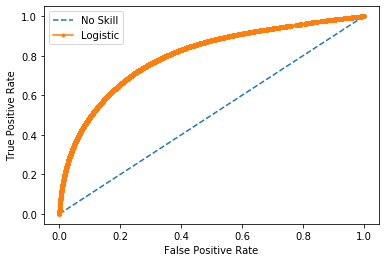

FLAG_PERFUM
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.68      0.80      0.73    227372
         1.0       0.75      0.61      0.67    221168

    accuracy                           0.71    448540
   macro avg       0.71      0.70      0.70    448540
weighted avg       0.71      0.71      0.70    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.774


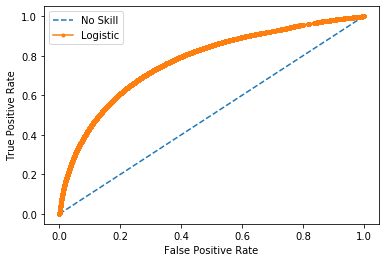

FLAG_LIQ
{'penalty': 'l2'}
              precision    recall  f1-score   support

         0.0       0.66      0.78      0.72    212685
         1.0       0.76      0.65      0.70    235855

    accuracy                           0.71    448540
   macro avg       0.71      0.71      0.71    448540
weighted avg       0.72      0.71      0.71    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.782


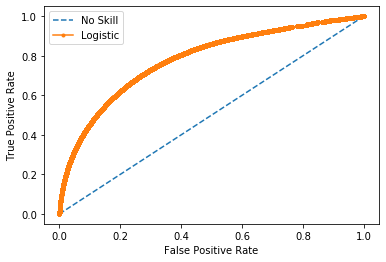

FLAG_CASA
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.75      0.80      0.78    244718
         1.0       0.74      0.68      0.71    203822

    accuracy                           0.75    448540
   macro avg       0.75      0.74      0.75    448540
weighted avg       0.75      0.75      0.75    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.819


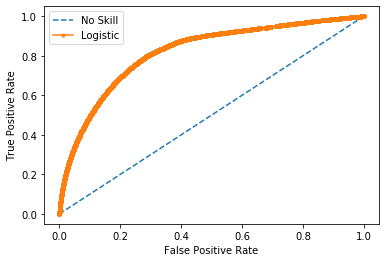

FLAG_JARDIN
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.95      0.76      0.85    404295
         1.0       0.23      0.65      0.34     44245

    accuracy                           0.75    448540
   macro avg       0.59      0.71      0.59    448540
weighted avg       0.88      0.75      0.80    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.761


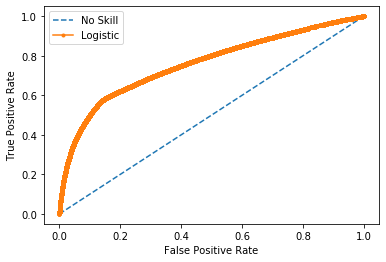

FLAG_FERRAM
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81    409506
         1.0       0.18      0.67      0.28     39034

    accuracy                           0.70    448540
   macro avg       0.57      0.68      0.54    448540
weighted avg       0.89      0.70      0.76    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.733


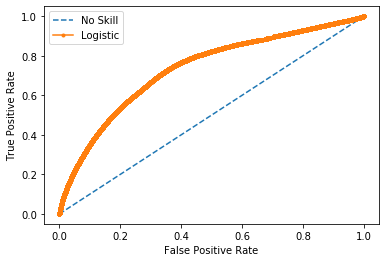

FLAG_SALSIC
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.86      0.77      0.82    335016
         1.0       0.49      0.64      0.55    113524

    accuracy                           0.74    448540
   macro avg       0.68      0.71      0.68    448540
weighted avg       0.77      0.74      0.75    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.765


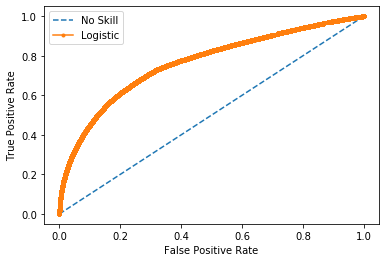

FLAG_CALCAD
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.99      0.58      0.73    431735
         1.0       0.07      0.80      0.13     16805

    accuracy                           0.59    448540
   macro avg       0.53      0.69      0.43    448540
weighted avg       0.95      0.59      0.71    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.753


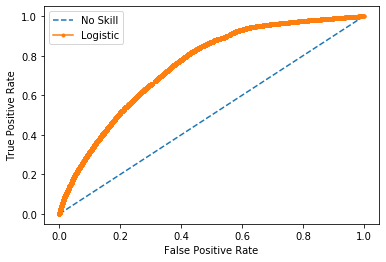

FLAG_CAMEBA
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.98      0.66      0.79    433620
         1.0       0.06      0.67      0.12     14920

    accuracy                           0.66    448540
   macro avg       0.52      0.67      0.45    448540
weighted avg       0.95      0.66      0.77    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.725


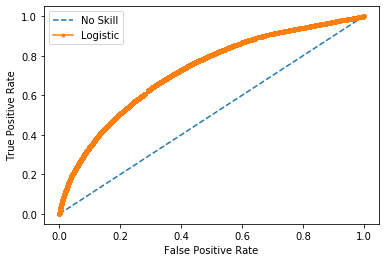

FLAG_FOTO
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.99      0.67      0.80    443698
         1.0       0.02      0.56      0.04      4842

    accuracy                           0.67    448540
   macro avg       0.51      0.62      0.42    448540
weighted avg       0.98      0.67      0.79    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.654


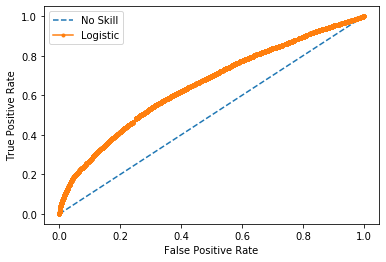

FLAG_POSTO
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.98      0.48      0.65    376992
         1.0       0.26      0.96      0.41     71548

    accuracy                           0.56    448540
   macro avg       0.62      0.72      0.53    448540
weighted avg       0.87      0.56      0.61    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.924


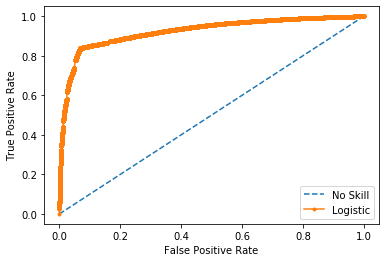

FLAG_TEXT
{'penalty': 'l2'}
              precision    recall  f1-score   support

         0.0       0.96      0.62      0.76    392859
         1.0       0.23      0.80      0.36     55681

    accuracy                           0.65    448540
   macro avg       0.59      0.71      0.56    448540
weighted avg       0.87      0.65      0.71    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.782


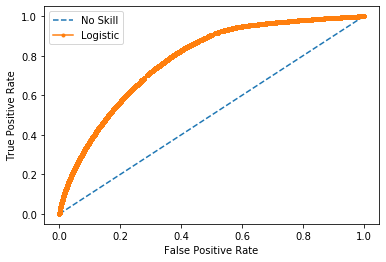

FLAG_ELETRO
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.98      0.50      0.66    419449
         1.0       0.10      0.84      0.18     29091

    accuracy                           0.52    448540
   macro avg       0.54      0.67      0.42    448540
weighted avg       0.92      0.52      0.63    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.733


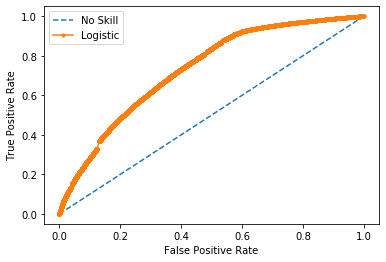

FLAG_DROGARIA
{'penalty': 'l1'}
              precision    recall  f1-score   support

         0.0       0.99      0.59      0.74    436794
         1.0       0.05      0.80      0.09     11746

    accuracy                           0.60    448540
   macro avg       0.52      0.70      0.42    448540
weighted avg       0.97      0.60      0.72    448540

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.783


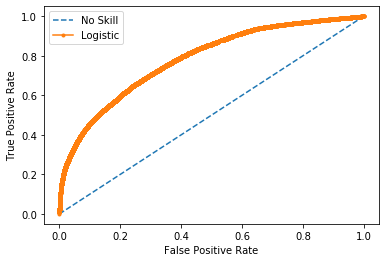

In [16]:
for i in range(0,len(target)):
    foco = vars.copy()
    foco.append(target[i])
    bad=df[df[target[i]]==1][foco]
    good=df[df[target[i]]==0][foco].sample(min(df[df[target[i]]==0].shape[0],df[df[target[i]]==1].shape[0]),replace=False)
    desenv=pd.concat([bad, good], ignore_index=True)
    #x_train, x_test, y_train, y_test=train_test_split(scaler.fit_transform(desenv[vars]),desenv[target[i]],test_size=0.3,random_state=1)
    grid={"penalty":["l1","l2"]}# l1 lasso l2 ridge
    logreg=LogisticRegression(solver='liblinear')
    logreg_cv=GridSearchCV(logreg,grid,cv=5)
    logreg_cv.fit(scaler.fit_transform(desenv[vars]),desenv[target[i]])
    print(target[i])
    print(logreg_cv.best_params_)
    print(classification_report(valid[target[i]], logreg_cv.predict(scaler.fit_transform(valid[vars]))))
    # predict probabilities
    ns_probs = [0 for _ in range(len(valid[target[i]]))]
    lr_probs = logreg_cv.predict_proba(scaler.fit_transform(valid[vars]))
    valid['prob_'+target[i]]=logreg_cv.predict_proba(scaler.fit_transform(valid[vars]))[:, 1]
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(valid[target[i]], ns_probs)
    lr_auc = roc_auc_score(valid[target[i]], lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(valid[target[i]], ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(valid[target[i]], lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [207]:
valid.head()

,CPF_CRIP,ANOMES,QTD_TICKETS_SECA,QTD_TICKETS_PAS,QTD_TICKETS_DPH,QTD_TICKETS_FLV,QTD_TICKETS_PERFUM,QTD_TICKETS_LIQ,QTD_TICKETS_CASA,QTD_TICKETS_JARDIN,...,prob_FLAG_JARDIN,prob_FLAG_FERRAM,prob_FLAG_SALSIC,prob_FLAG_CALCAD,prob_FLAG_CAMEBA,prob_FLAG_FOTO,prob_FLAG_POSTO,prob_FLAG_TEXT,prob_FLAG_ELETRO,prob_FLAG_DROGARIA
0,000018274B5,202008,8,6,2,10,0,0,4,0,...,0.401129,0.383054,0.420645,0.540532,0.514240,0.540961,0.483996,0.573066,0.720773,0.755823
1,00001FD42F6,202008,2,1,1,0,0,0,0,0,...,0.405713,0.395479,0.370796,0.526415,0.615038,0.454957,0.544194,0.557165,0.533443,0.442736
2,00002CF143F,202008,4,2,2,0,0,1,0,0,...,0.348065,0.351949,0.629831,0.573159,0.518181,0.550409,0.999983,0.580530,0.767918,0.659997
3,0000368E069,202008,51,32,10,1,10,21,4,0,...,0.388509,0.383174,0.838726,0.876299,0.639903,0.588760,0.428243,0.825965,0.618056,0.858888
4,000086A0954,202008,0,0,0,0,0,0,0,0,...,0.400301,0.338652,0.384117,0.972874,0.810048,0.704688,0.626740,0.949114,0.947838,0.979776


In [208]:
valid.shape

(448540, 70)

In [209]:
valid.columns.tolist()

['CPF_CRIP',
 'ANOMES',
 'QTD_TICKETS_SECA',
 'QTD_TICKETS_PAS',
 'QTD_TICKETS_DPH',
 'QTD_TICKETS_FLV',
 'QTD_TICKETS_PERFUM',
 'QTD_TICKETS_LIQ',
 'QTD_TICKETS_CASA',
 'QTD_TICKETS_JARDIN',
 'QTD_TICKETS_FERRAM',
 'QTD_TICKETS_SALSIC',
 'QTD_TICKETS_CALCAD',
 'QTD_TICKETS_CAMEBA',
 'QTD_TICKETS_FOTO',
 'QTD_TICKETS_POSTO',
 'QTD_TICKETS_TEXT',
 'QTD_TICKETS_ELETRO',
 'QTD_TICKETS_DROGARIA',
 'QTD_ITEMS_SECA',
 'QTD_ITEMS_PAS',
 'QTD_ITEMS_DPH',
 'QTD_ITEMS_FLV',
 'QTD_ITEMS_PERFUM',
 'QTD_ITEMS_LIQ',
 'QTD_ITEMS_CASA',
 'QTD_ITEMS_JARDIN',
 'QTD_ITEMS_FERRAM',
 'QTD_ITEMS_SALSIC',
 'QTD_ITEMS_CALCAD',
 'QTD_ITEMS_CAMEBA',
 'QTD_ITEMS_FOTO',
 'QTD_ITEMS_POSTO',
 'QTD_ITEMS_TEXT',
 'QTD_ITEMS_ELETRO',
 'QTD_ITEMS_DROGARIA',
 'FLAG_SECA',
 'FLAG_PAS',
 'FLAG_DPH',
 'FLAG_FLV',
 'FLAG_PERFUM',
 'FLAG_LIQ',
 'FLAG_CASA',
 'FLAG_JARDIN',
 'FLAG_FERRAM',
 'FLAG_SALSIC',
 'FLAG_CALCAD',
 'FLAG_CAMEBA',
 'FLAG_FOTO',
 'FLAG_POSTO',
 'FLAG_TEXT',
 'FLAG_ELETRO',
 'FLAG_DROGARIA',
 'prob_FLAG_S

In [17]:
matrix_ds_setor_produtos = pd.read_sql("""
select PRF_DS_SETOR setor_carref,merc_ds_setorcci setor_atacad,count(*) qtd
from
(select distinct a.TICU_ID_ITEMCUPOM , a.PRF_DS_SETOR,b.merc_ds_setorcci  
from 
EVE_BUFFER_CCI_MANU_HCKT a
inner join
EVE_BUFFER_ATC_MANU_HCKT b
on a.TICU_ID_ITEMCUPOM = b.icpa_cd_itemcupom )
group by PRF_DS_SETOR,merc_ds_setorcci
""", con=connection)

In [18]:
matrix_ds_setor_produtos

,SETOR_CARREF,SETOR_ATACAD,QTD


In [17]:
exc_atc = pd.read_sql(
"""
select distinct cpf_crip
from EVE_BUFFER_ATC_MANU_HCKT
where DATE_REF>=20200601 and DATE_REF<=20200831
and CPF_CRIP not in (select distinct
CPF_CRIP
from EVE_BUFFER_CCI_MANU_HCKT
where ANOMES>=202006 and ANOMES<=202008)
"""
,con=connection)

In [18]:
exc_atc.head()

,CPF_CRIP
0,F645C2783CD
1,99D6506BB5C
2,F4DB57EF242
3,B9C9F5941FB
4,F01F213238E


In [19]:
exc_atc.shape

(325130, 1)

In [20]:
valid_exc_atc=valid[valid.CPF_CRIP.isin(exc_atc.CPF_CRIP)]

In [21]:
valid_exc_atc.shape

(158833, 70)

In [22]:
valid_exc_atc=valid_exc_atc[valid_exc_atc.QTD_ITEMS_ELETRO==0]

In [23]:
valid_exc_atc.shape

(158833, 70)

In [24]:
valid_exc_atc=valid_exc_atc[valid_exc_atc.FLAG_ELETRO==1]

In [25]:
valid_exc_atc.shape

(982, 70)

In [29]:
valid_exc_atc[valid_exc_atc.prob_FLAG_ELETRO>=0.5][['CPF_CRIP','QTD_ITEMS_ELETRO','FLAG_ELETRO','prob_FLAG_ELETRO']]

,CPF_CRIP,QTD_ITEMS_ELETRO,FLAG_ELETRO,prob_FLAG_ELETRO
409,00225F37020,0,1.0,0.516679
26494,0844C8C7F8E,0,1.0,0.514149
33851,0A8BE26F0E5,0,1.0,0.524145
90508,1C212544BFA,0,1.0,0.509085
118715,24F12BF3B00,0,1.0,0.501752
146870,2DB044EC5BE,0,1.0,0.510633
154330,2FF9BEFA786,0,1.0,0.509167
241325,4B2809C9228,0,1.0,0.500035
271122,546D199FCF0,0,1.0,0.524295
274118,555C83F0A02,0,1.0,0.502947


In [248]:
#350D2643DA9
pd.read_sql("""
(select
*
FROM EVE_BUFFER_ATC_MANU_HCKT
where DATE_REF>=20200601 and DATE_REF<=20200831 and CPF_CRIP = '350D2643DA9')
""",con=connection)

,CPF_CRIP,CPA_ID_CUPOM,ICPA_CD_ITEMCUPOM,MERC_TP_MERCDR,MERC_DS_DEPTOCCI,MERC_DS_SETORCCI,MERC_DS_GRUPO,MERC_DS_SUBGRUPO,MERC_DS_CLAS,MERC_DS_REDUZMERCDR,...,ICPA_VL_BONUS,ICPA_VL_BONUSATC,ICPA_QT_ITEMCOMPD,ICPA_SG_TIPOVENDA,ICPA_SG_EMBLG,ICPA_QT_EMBLG,ICPA_CD_FILIAL,FAL_NM_FLIAL,FAL_DS_DIVISREG,DATE_REF
